In [2]:
where python

SyntaxError: invalid syntax (2490086425.py, line 1)

In [1]:
from cellpose import models
from cellpose.io import imread



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.6 
platform:       	win32 
python version: 	3.12.10 
torch version:  	2.8.0+cu126! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




In [2]:
#intiialize model
model = models.CellposeModel(gpu=True,pretrained_model='cpsam')

In [3]:
img = imread("C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/B+_w1/W001/P00001/HM_W001_P00001_CH2.tif")

In [4]:
masks, flows, styles = model.eval([img], diameter=30, flow_threshold=0.4, cellprob_threshold=0.0)

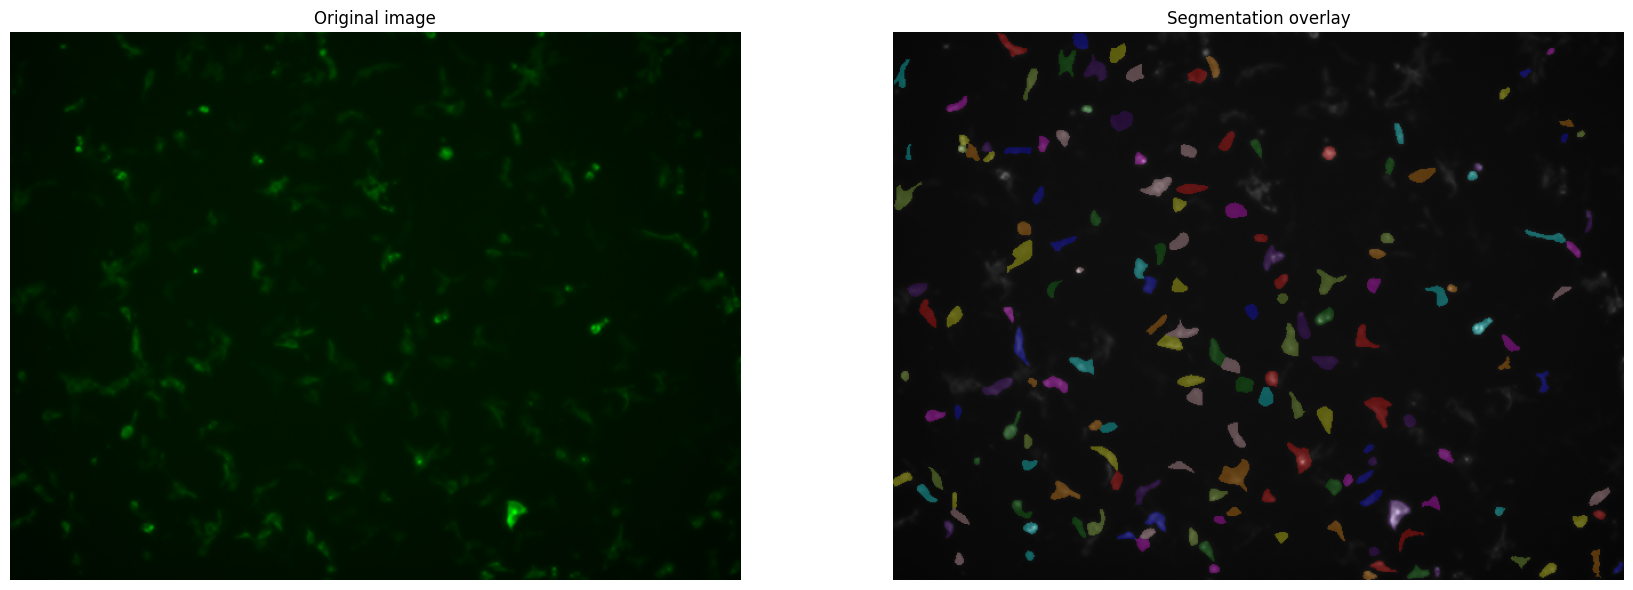

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import label2rgb
from cellpose import plot

# Extract actual data (since model.eval([img]) returns lists)
mask = masks[0]
flow = flows[0]

# --- Create figure with 3 panels ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1️⃣ Original image
axes[0].imshow(img if img.ndim == 2 else img[..., :3])
axes[0].set_title("Original image")
axes[0].axis('off')

# 2️⃣ Segmentation mask overlay
overlay = label2rgb(mask, image=img if img.ndim == 2 else img[..., :3], bg_label=0, alpha=0.3)
axes[1].imshow(overlay)
axes[1].set_title("Segmentation overlay")
axes[1].axis('off')


plt.tight_layout()
plt.show()


In [6]:
from pathlib import Path
from skimage import io # Make sure this is imported

# Define the folder where you want to save the masks
# *** CHANGE THIS PATH TO YOUR DESIRED LOCATION ***
save_folder = Path("C:/Users/labadmin/Documents/BZ-X800/Chris/Psychatg02_07112025/cellpose_masks")

# Create the folder if it doesn't exist
save_folder.mkdir(parents=True, exist_ok=True)

print(f"Masks will be saved to: {save_folder.resolve()}")

Masks will be saved to: C:\Users\labadmin\Documents\BZ-X800\Chris\Psychatg02_07112025\cellpose_masks
